# 1. Load dataset

#### In this assignment, you will use a student exams results dataset (exams.csv). It is a collection of exam scores and a binary value indicating whether the student has passed the course. You will need to read the data from data file (exams.csv). It contains three columns. First two columns (exam_1, exam_2) are exam scores of a student and the third value indicates whether the student has passed the course or not (1 or 0).
#### It is recommended to normalize the data at this stage. Gradient descent algorithm performs much better when the data is normalized. Use min-max normalization.

In [4]:
import pandas as pd
import numpy as np

In [56]:
df=pd.read_csv('exams.csv')

In [57]:
df.head()

,exam_1,exam_2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


# 2. Visualize

#### Plot a graph of first exam score vs second exam score. Admitted student points should be green and failed student points should be red. It should look similar to the one below.
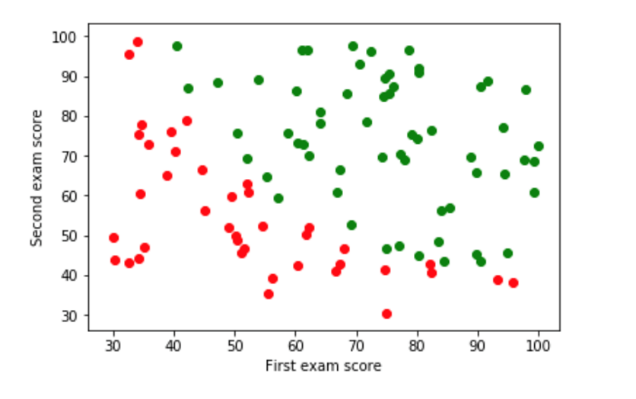

C:\Users\hurua\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='exam_1', ylabel='exam_2'>

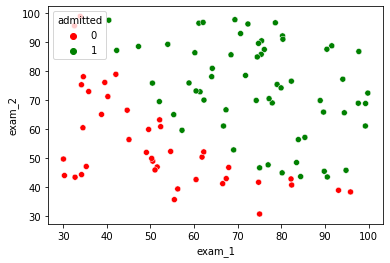

In [58]:
import seaborn as sns
sns.scatterplot('exam_1', 'exam_2', data=df, hue='admitted',palette=['r', 'g'])

# 3. Logistic Regression

#### Implement Logistic Regression from scratch (using numpy)
a) Implement a function which returns sigmoid of a value given the value.

In [59]:
import math
X1=df['exam_1']
X1=(X1-X1.min())/(X1.max()-X1.min())
X2=df['exam_2']

X2=(X2-X2.min())/(X2.max()-X2.min())
X0=np.ones(len(X1))
X=np.array([X0,X1,X2])
Y=df['admitted']
w=np.array([1,2,3])

In [60]:
X1

0     0.065428
1     0.003266
2     0.082968
3     0.431764
4     0.701943
        ...   
95    0.765817
96    0.174904
97    0.992649
98    0.362356
99    0.640930
Name: exam_1, Length: 100, dtype: float64

In [61]:
((math.e)**((-1)*(X.T.dot(w))))

array([0.04016255, 0.20379386, 0.04856807, 0.01341298, 0.01265044,
       0.07725297, 0.00834249, 0.05028947, 0.00809382, 0.04385317,
       0.0399049 , 0.10140064, 0.01095547, 0.00624378, 0.03806935,
       0.01411014, 0.04545045, 0.0612655 , 0.00742592, 0.04546174,
       0.07373311, 0.01418282, 0.09171365, 0.17960546, 0.01727905,
       0.02592084, 0.04679864, 0.04209645, 0.06238593, 0.06319284,
       0.02345805, 0.0235449 , 0.04682374, 0.03555556, 0.04621751,
       0.07035535, 0.01639866, 0.01516587, 0.0630181 , 0.0459716 ,
       0.02539778, 0.09727138, 0.01249738, 0.05288517, 0.10326088,
       0.05698411, 0.01652964, 0.0044829 , 0.00802328, 0.00491202,
       0.01298062, 0.01330198, 0.03703491, 0.08739745, 0.08859686,
       0.0582362 , 0.00986532, 0.01967413, 0.0184932 , 0.01357856,
       0.00888385, 0.15392158, 0.11867145, 0.15969096, 0.0500814 ,
       0.08148737, 0.01441544, 0.08372574, 0.00584103, 0.03380586,
       0.19502103, 0.01727738, 0.00612044, 0.02378391, 0.02206

In [62]:
def sigmoid(X,w):
    h=1/(1+((math.e)**((-1)*(X.T.dot(w)))))
    return h
sigmoid(X,w)

array([0.9613882 , 0.83070701, 0.95368153, 0.98676455, 0.98750759,
       0.92828707, 0.99172653, 0.95211846, 0.99197116, 0.95798914,
       0.9616264 , 0.90793483, 0.98916326, 0.99379496, 0.96332678,
       0.98608619, 0.95652548, 0.94227128, 0.99262882, 0.95651516,
       0.93133013, 0.98601552, 0.91599111, 0.84774107, 0.98301444,
       0.97473408, 0.95529356, 0.95960407, 0.94127753, 0.94056314,
       0.97707962, 0.97699671, 0.95527066, 0.96566523, 0.95582419,
       0.93426917, 0.98386592, 0.9850607 , 0.94071776, 0.9560489 ,
       0.97523129, 0.91135158, 0.98765687, 0.94977119, 0.90640393,
       0.94608802, 0.98373915, 0.9955371 , 0.99204058, 0.99511199,
       0.98718572, 0.98687264, 0.96428769, 0.91962695, 0.91861371,
       0.94496862, 0.99023106, 0.98070547, 0.98184259, 0.98660335,
       0.99119437, 0.86661001, 0.89391751, 0.86229869, 0.95230713,
       0.9246525 , 0.98578941, 0.92274269, 0.99419288, 0.96729961,
       0.83680536, 0.98301606, 0.99391679, 0.97676862, 0.97841

b) Implement the following cost function.
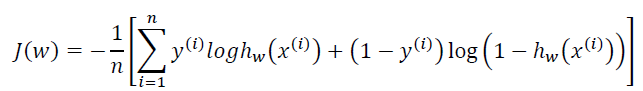

In [63]:
def cost(X,Y,w):
    h=1/(1+(math.e)**((-1)*(X.T.dot(w))))
    n=len(Y)
    J=np.sum(Y*np.log(h)+(1-Y)*np.log(1-h))/((-1)*n)
    return J

In [64]:
sigmoid(X,w)

array([0.9613882 , 0.83070701, 0.95368153, 0.98676455, 0.98750759,
       0.92828707, 0.99172653, 0.95211846, 0.99197116, 0.95798914,
       0.9616264 , 0.90793483, 0.98916326, 0.99379496, 0.96332678,
       0.98608619, 0.95652548, 0.94227128, 0.99262882, 0.95651516,
       0.93133013, 0.98601552, 0.91599111, 0.84774107, 0.98301444,
       0.97473408, 0.95529356, 0.95960407, 0.94127753, 0.94056314,
       0.97707962, 0.97699671, 0.95527066, 0.96566523, 0.95582419,
       0.93426917, 0.98386592, 0.9850607 , 0.94071776, 0.9560489 ,
       0.97523129, 0.91135158, 0.98765687, 0.94977119, 0.90640393,
       0.94608802, 0.98373915, 0.9955371 , 0.99204058, 0.99511199,
       0.98718572, 0.98687264, 0.96428769, 0.91962695, 0.91861371,
       0.94496862, 0.99023106, 0.98070547, 0.98184259, 0.98660335,
       0.99119437, 0.86661001, 0.89391751, 0.86229869, 0.95230713,
       0.9246525 , 0.98578941, 0.92274269, 0.99419288, 0.96729961,
       0.83680536, 0.98301606, 0.99391679, 0.97676862, 0.97841

In [65]:
initial_cost=cost(X,Y,w)
initial_cost

1.115739277437995

c) Write code that finds the best fit parameters for logistic regression using gradient descent from scratch. You should be able to change training step and number of iterations through the variables (or input to the function). In addition, you should save the cost value at each iteration for plottting.
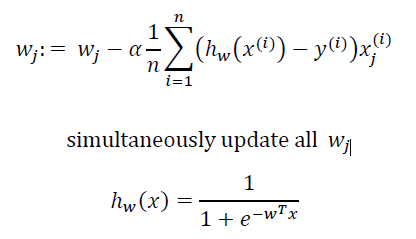

In [66]:
iterations=10000
alpha=0.01
def gradient(X,Y,w,alpha,iterations):
    cost_history=[0]*iterations
    n=len(Y)
    for i in range(iterations):
        if i%1000==0:
            print(f'{i} cost {cost(X,Y,w)}')
        h=1/(1+(math.e)**((-1)*(X.T.dot(w))))
        loss=h-Y
        gradient=X.dot(loss)/n
        w=w-alpha*gradient
        Cost=cost(X,Y,w)
        cost_history[i]=Cost
    return w,cost_history

In [67]:
w,cost_history=gradient(X,Y,w,alpha,iterations)

0 cost 1.115739277437995
1000 cost 0.4758304948075459
2000 cost 0.44415687892769123
3000 cost 0.42315849004665906
4000 cost 0.40550530555462977
5000 cost 0.3904610731276681
6000 cost 0.37748964647662603
7000 cost 0.36618783476168687
8000 cost 0.35624855630041957
9000 cost 0.34743485010559005


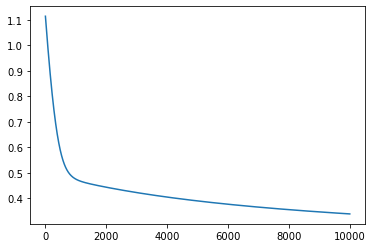

In [68]:
import matplotlib.pyplot as plt
plt.plot(cost_history)

d) Plot the graph of the cost function and describe how it changes over iterations. It should look like the following:
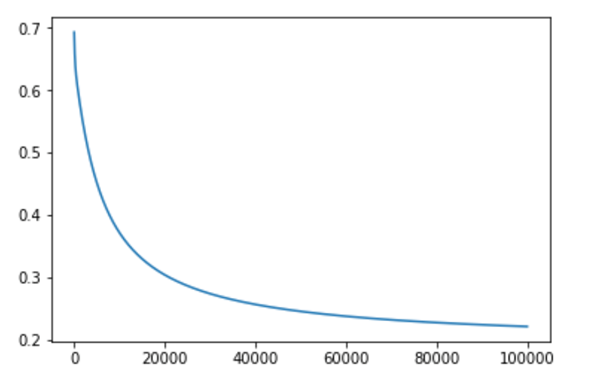

e) Plot points of the first exam score vs the second exam score. Admitted student points should be green and failed student points should be red. (same as Visualization part). And plot the decision boundary using the parameters found by gradient descent on the same graph. It should look similar to this:
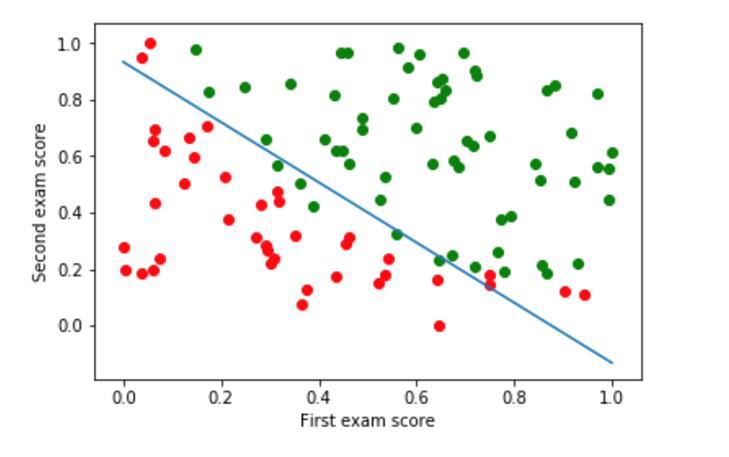

([0.0, 1.0], array([ 0.87602937, -0.17640105]))

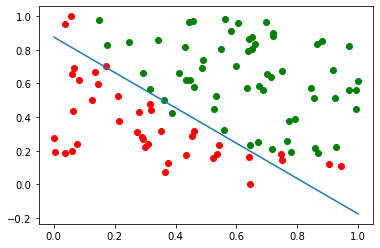

In [74]:
plt.scatter(X1[df['admitted']==1],X2[df['admitted']==1],c='g')
plt.scatter(X1[df['admitted']==0],X2[df['admitted']==0],c='r')
x_values=[np.min(X1),np.max(X1)]
y_values=-(w[0]+np.dot(w[1],x_values))/w[2]
plt.plot(x_values,y_values)
(x_values,y_values)

In [70]:
w[0]+np.dot(w[1],x_values)/w[2]

array([ 28.43932586, 101.86638075])

In [71]:
X2[df['admitted']==1]

3     0.816001
4     0.655392
6     0.965459
7     0.233655
8     0.832291
9     0.189408
12    0.672056
13    0.983143
15    0.858465
16    0.324278
18    0.912954
19    0.248625
21    0.515572
24    0.562051
25    0.576438
26    0.208278
30    0.618236
31    0.387435
33    0.568797
37    0.736892
40    0.376538
42    0.512196
46    0.583817
47    0.822143
48    0.969229
49    0.850978
50    0.638088
51    0.445254
52    0.187316
56    0.560429
58    0.574535
59    0.700937
60    0.807965
66    0.980455
68    0.901073
69    0.445142
71    0.694757
72    0.961301
73    0.622442
74    0.662923
75    0.611811
76    0.847749
77    0.662211
80    0.574231
81    0.221062
82    0.527144
83    0.423504
84    0.884140
85    0.805539
87    0.876295
88    0.967451
90    0.681975
91    0.833583
93    0.794564
94    0.216140
95    0.260407
96    0.827651
97    0.559166
98    0.502865
99    0.863188
Name: exam_2, dtype: float64

f) Make predictions of the training data using your trained model, compare predicted labels with actuals label and print the score indicating how well your model performs. You can use accuracy_score function from scikit-learn library. After doing that, check if your model makes correct predictions for these data: {55, 70, 1} and {40, 60, 0}.

In [85]:
X=np.array([1,40,60])

sigmoid(X,w)

1.0

# 4. Logistic Regression using library

#### Use a library to perform logistic regression on the data. You should use the same features as input to this model and perform the same testing (3(f)) as above (using scikit-learn library is recommended).

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [101]:
LogR=LogisticRegression()
X=df[['exam_1','exam_2']]
Y=df['admitted']

In [102]:
scaler = MinMaxScaler()
scaler.fit_transform(X,Y)

array([[0.06542784, 0.69465488],
       [0.00326632, 0.19470455],
       [0.08296784, 0.61961779],
       [0.43176427, 0.81600135],
       [0.7019434 , 0.65539214],
       [0.2153456 , 0.37665959],
       [0.44500891, 0.96545859],
       [0.64449684, 0.23365526],
       [0.65989108, 0.83229079],
       [0.77934283, 0.18940757],
       [0.94315096, 0.11165142],
       [0.64433793, 0.        ],
       [0.74887421, 0.67205614],
       [0.56336978, 0.98314328],
       [0.13586997, 0.6655353 ],
       [0.34273413, 0.85846452],
       [0.55914951, 0.32427783],
       [0.5430494 , 0.23547989],
       [0.58195856, 0.91295399],
       [0.67250409, 0.24862534],
       [0.53481039, 0.17922749],
       [0.85450448, 0.51557164],
       [0.29348214, 0.26737325],
       [0.05952839, 0.19931197],
       [0.68605319, 0.56205138],
       [0.46169753, 0.57643769],
       [0.71853306, 0.20827835],
       [0.90377581, 0.12008007],
       [0.45537943, 0.28788555],
       [0.12508388, 0.50379883],
       [0.

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [104]:
X.shape

(100, 2)

In [109]:
LogR.fit(x_train,y_train)

LogisticRegression()

In [110]:
LogR.predict(x_test)

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0], dtype=int64)

In [116]:
LogR.predict([[55,70]])

array([1], dtype=int64)

In [113]:
X

,exam_1,exam_2
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376
...,...,...
95,83.489163,48.380286
96,42.261701,87.103851
97,99.315009,68.775409
98,55.340018,64.931938
